<a href="https://colab.research.google.com/github/aniketkumar00015-beep/WOC8.0/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

**Defining function**

In [116]:
def zscore_normmalise(X):
  mean=np.mean(X,axis=0)
  std_dev=np.std(X,axis=0)
  X_norm=(X-mean)/std_dev
  return X_norm,mean,std_dev

In [117]:
def initialise_parameters(X):
  w=np.zeros((1,X.shape[1]))
  b=0
  return w,b

In [118]:
def compute_cost(X,y,w,b):
  m=X.shape[0]
  # Ensure y is a 2D column vector for consistent operations
  y = y.reshape(-1, 1) if y.ndim == 1 else y
  f_x=w@X.T+b #shape(1,m)
  f_x=f_x.reshape(m,1)
  cost=np.sum((f_x-y)**2)/(2*m)
  return cost

In [119]:
def gradient(X,y,w,b):
  m,n=X.shape
  # Ensure y is a 2D column vector for consistent operations
  y = y.reshape(-1, 1) if y.ndim == 1 else y
  dj_dw=np.zeros((1,n))
  dj_db=0
  f_x=w@X.T+b    # Shape: (1, m)
  f_x=f_x.T      # Transpose to (m, 1) to match y shape
  dj_dw=(1/m)*(f_x-y).T@X  ## (f_x-y) is (m,1), transpose to (1,m) then @X gives (1,n)
  dj_db=(1/m)*(np.sum(f_x-y))
  return dj_dw,dj_db

In [120]:
def gradient_descent(X,y,w_in,b_in,alpha,iterations):
  cost_history=[]
  w=w_in
  b=b_in
  for i in range(iterations):
    dj_dw,dj_db=gradient(X,y,w,b)

    w=w-alpha*dj_dw
    b=b-alpha*dj_db

    if i<100000:
      cost_history.append(compute_cost(X,y,w,b))
    if i%np.ceil(iterations/10)==0:
      print(f"Iteration{i:4d}: cost {cost_history[-1]}")

  return w,b,cost_history


In [121]:
def predict(X,wf,bf):
  pred=X@wf.T+bf
  return pred

In [122]:
def r2_score(X,y,w,b):
  f_x=w@X.T+b
  # Flatten both arrays to ensure proper shape matching
  f_x = f_x.flatten()
  y = y.flatten()
  y_mean=np.mean(y)
  ss_res=np.sum((f_x-y)**2)
  ss_tot=np.sum((y-y_mean)**2)
  # Avoid division by zero
  if ss_tot == 0:
    return 0.0
  r2=1-(ss_res/ss_tot)
  return r2

In [123]:
def cost_vs_iteration(j):
  iterations=list(range(1,len(j)+1))
  style.use('ggplot')
  plt.plot(iterations,j)
  plt.title('Cost vs Iteration')
  plt.xlabel('Iterations')
  plt.ylabel('Cost')
  plt.show()

In [124]:
def graphical_analysis(x,y):
  n=x.shape[1]
  style.use('default')
  for i in range(n):
    plt.scatter(x[:,i],y,c='red')
    plt.title(f'Feature {i} and predicted output')
    plt.xlabel(f'Feature {i}')
    plt.ylabel('Target') # Changed to a string label
    plt.show()

In [125]:
df=pd.read_csv('/content/drive/MyDrive/WOC/Linear Regression Train.csv')
df

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,target
0,-0.8589,32.0681,0.8988,-0.9199,3.2330,0.8989,-0.6383,16910.0,187.9845,522.0,-0.4012,-0.0372,0.0682,0.1680,98.5600,25.0
1,-0.3604,16.1950,1.4917,-1.0816,-0.5577,1.4918,0.7571,8370.0,155.7592,1164.0,0.2620,0.0356,0.1224,0.7190,59.7760,67.0
2,0.3321,11.0785,0.5486,-0.3012,-0.5602,0.5487,-0.6599,17204.0,189.5140,1440.0,0.1922,0.4314,0.1546,0.8879,33.4151,86.0
3,-0.9664,-18.9944,-0.9897,-1.2719,0.1397,-0.9896,-2.0511,16016.0,182.5419,166.0,0.4422,1.7373,0.0238,1.2060,56.5375,5.0
4,-0.5001,46.4172,0.9271,0.7189,-0.6647,0.9272,-0.7340,19998.0,203.7299,2450.0,0.3864,2.0814,0.2525,-0.1641,14.0241,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,-0.0157,17.7576,-0.1934,1.7448,-0.5354,-0.1933,-1.5330,13962.0,177.7798,837.0,1.5135,0.5072,0.0957,0.3787,90.8927,48.0
599996,-0.0867,0.9109,0.8414,0.2597,1.0794,0.8415,-0.1079,11970.0,171.7199,1360.0,0.5927,0.9062,0.1860,1.9531,86.2761,64.0
599997,0.6780,42.7486,0.0919,-0.0678,0.9373,0.0920,-0.4988,17381.0,191.2741,3024.0,-0.7913,1.0308,0.2569,0.7422,14.0241,192.0
599998,-1.8331,5.5458,-0.4194,-1.6771,-0.5794,-0.4193,-0.6245,17756.0,193.7598,1581.0,0.1458,0.8771,0.1809,0.3845,74.5113,81.0


In [126]:
df.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,target
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,-0.003146,15.408683,-0.001550,0.000870,-0.001427,-0.001450,-0.001961,13300.472118,174.701072,1541.739063,0.001195,0.001162,0.153837,-0.002516,49.140260,88.298465
std,1.000367,18.674270,1.002076,0.999129,0.999973,1.002076,1.001628,3407.265993,12.978940,932.816717,1.001415,1.000151,0.074446,0.999813,36.841911,62.430516
min,-4.339600,-65.207400,-4.717200,-4.823400,-4.616700,-4.717100,-4.507800,5289.000000,128.256700,67.000000,-4.499800,-4.811600,0.009200,-4.765500,-61.256000,1.000000
25%,-0.675100,2.724275,-0.677600,-0.671900,-0.676700,-0.677500,-0.678000,10354.000000,164.248475,728.000000,-0.675400,-0.674300,0.092000,-0.678300,14.024100,34.000000
50%,-0.002800,15.424800,-0.002200,0.001500,-0.001800,-0.002100,-0.002400,12900.000000,174.559700,1442.000000,0.000000,0.000900,0.159100,-0.002000,51.474000,77.000000
75%,0.672000,28.102500,0.675400,0.673400,0.673600,0.675500,0.673700,16016.000000,184.855425,2323.000000,0.674400,0.675800,0.219000,0.672800,86.276100,136.000000
max,5.070700,102.767100,4.687300,4.705100,4.648100,4.687400,4.722800,28776.000000,224.282400,3840.000000,4.883500,4.710000,0.363600,5.026000,99.955300,314.000000


In [127]:
X=df.drop(columns=['target'])
y=df['target']


In [128]:
X_train=X.head(50000).to_numpy()
y_train=y.head(50000).to_numpy()
X_cv=X.tail(100000).to_numpy()
y_cv=y.tail(100000).to_numpy() # Corrected to take last 100,000 rows

In [129]:
X_train_norm,mean1,std_dev1=zscore_normmalise(X_train)
X_cv_norm=(X_cv-mean1)/std_dev1

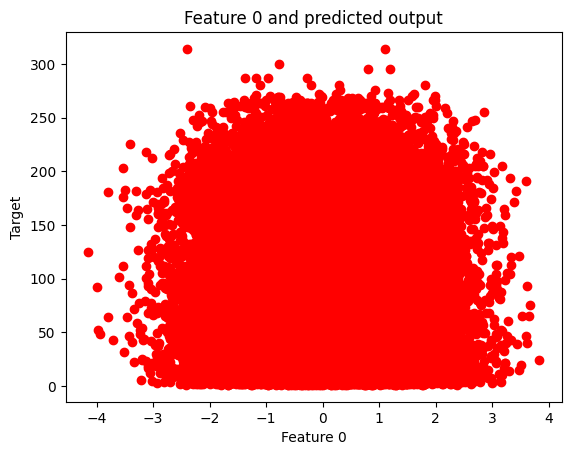

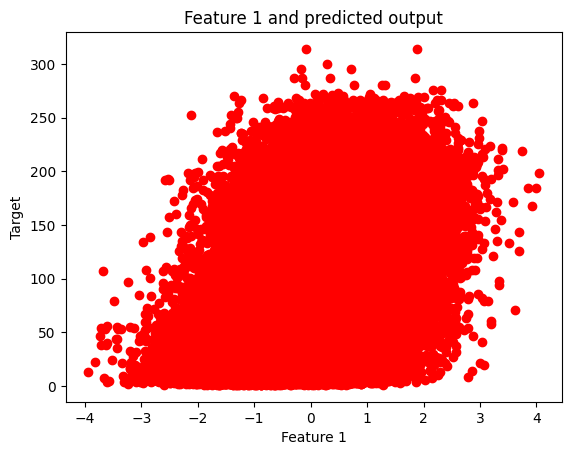

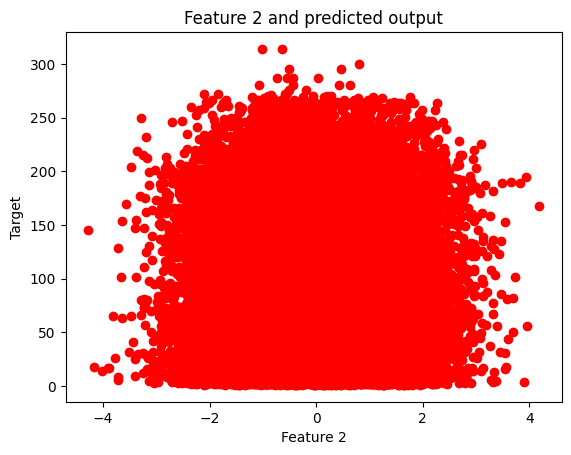

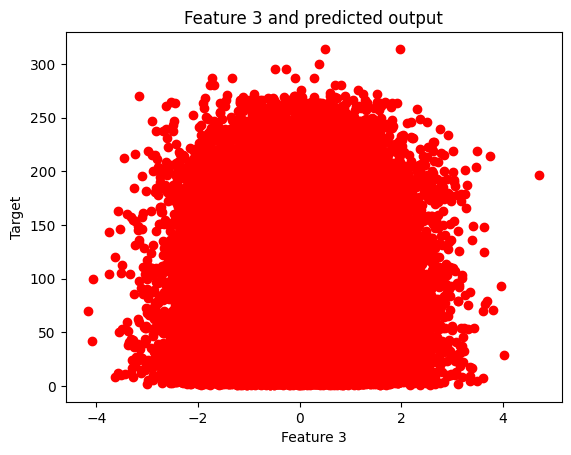

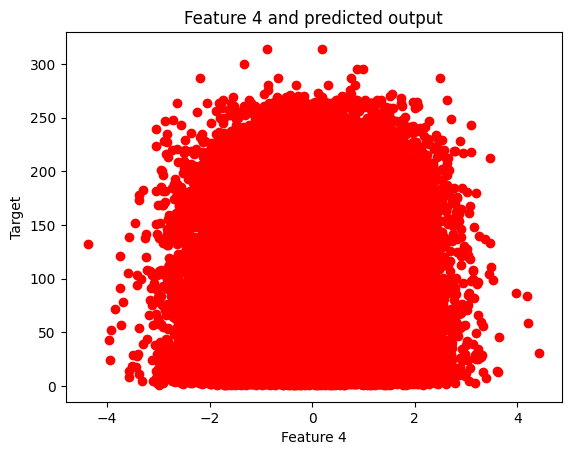

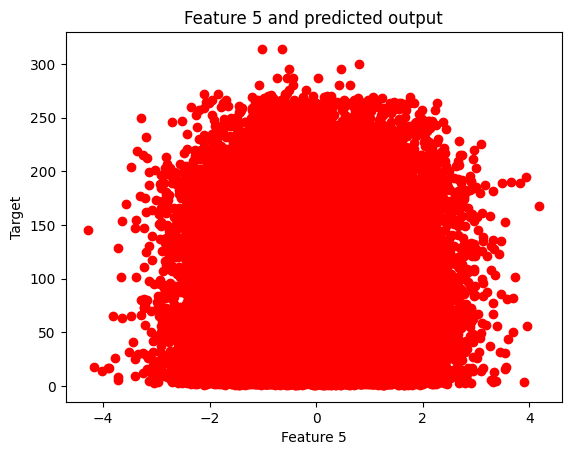

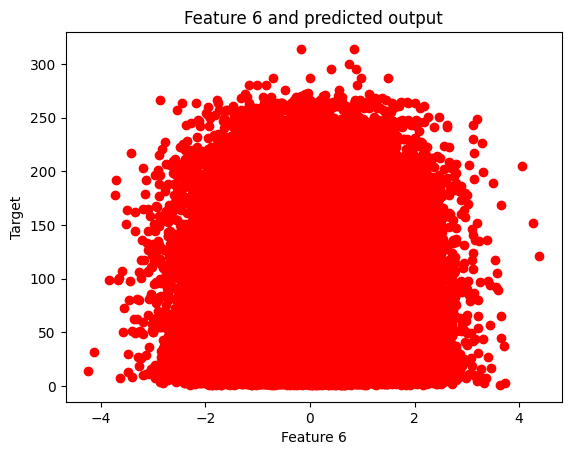

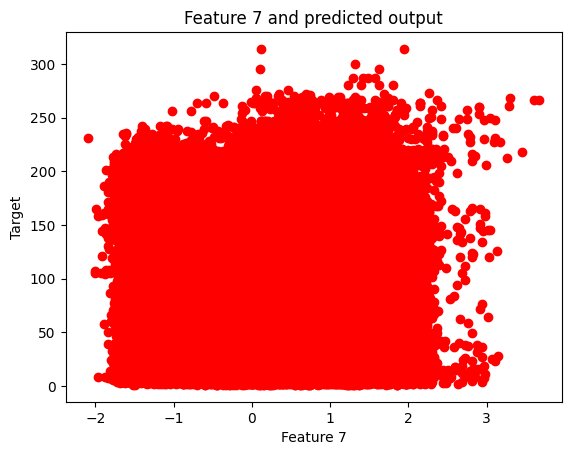

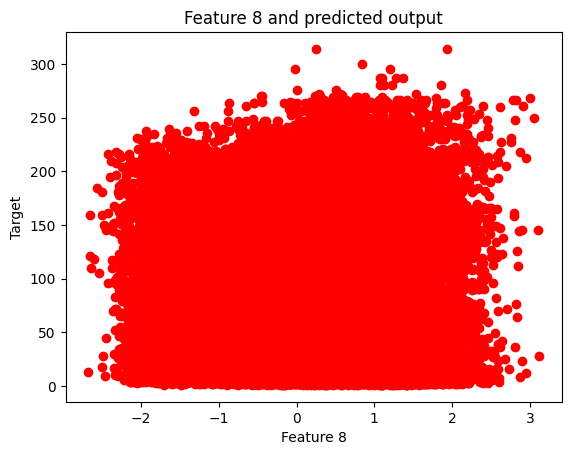

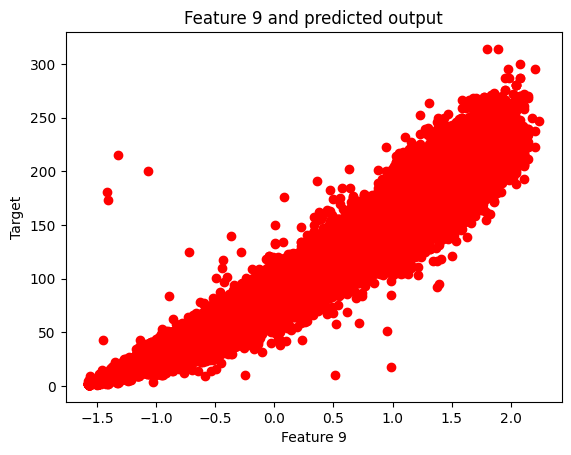

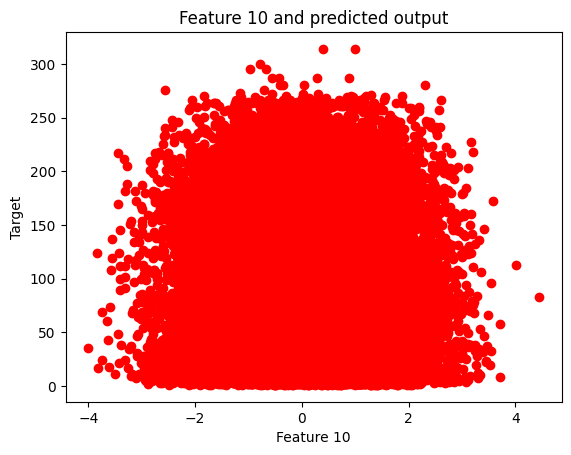

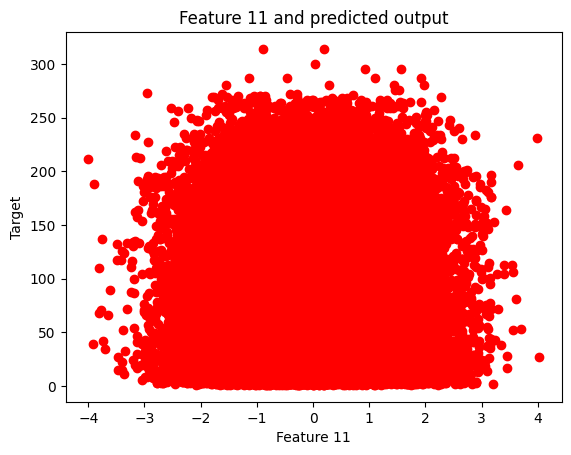

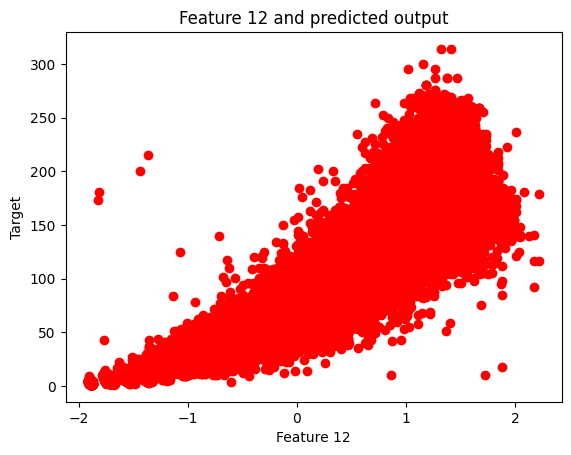

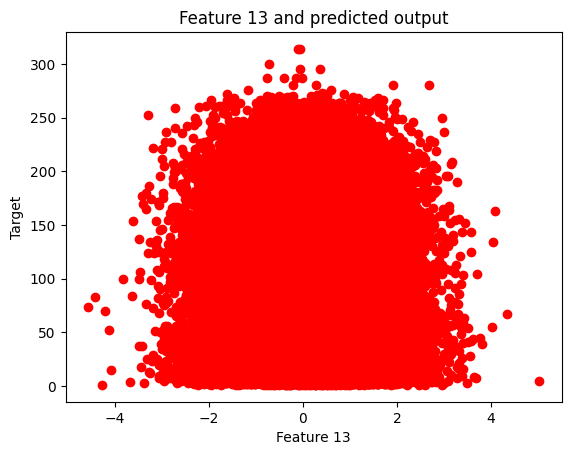

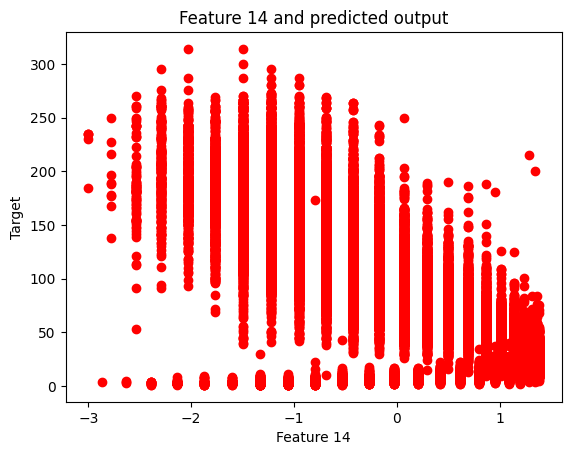

In [130]:
graphical_analysis(X_train_norm,y_train)

In [131]:
w,b=initialise_parameters(X_train_norm)

In [132]:
alpha=0.2
iteration=3000
wf,bf,j = gradient_descent(X_train_norm,y_train,w,b,alpha,iteration)

Iteration   0: cost 2986.2272056686697
Iteration 300: cost 65.74288607420192
Iteration 600: cost 61.76291827981492
Iteration 900: cost 61.574579626405864
Iteration1200: cost 61.56561801766702
Iteration1500: cost 61.565190977693725
Iteration1800: cost 61.56517062040965
Iteration2100: cost 61.565169649864224
Iteration2400: cost 61.56516960359164
Iteration2700: cost 61.56516960138549


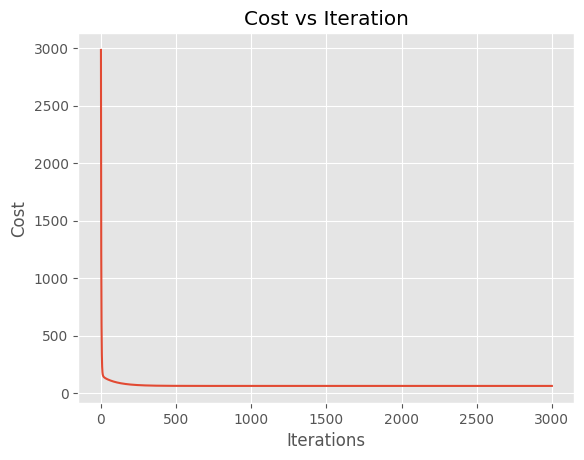

In [133]:
cost_vs_iteration(j)

In [134]:
print(f"R2 score on training data: {r2_score(X_train_norm, y_train, wf, bf):.4f}")
print(f"R2 score on cross-validation data: {r2_score(X_cv_norm, y_cv, wf, bf):.4f}")

R2 score on training data: 0.9683
R2 score on cross-validation data: 0.9690


**Predection**

In [135]:
df_t=pd.read_csv('/content/drive/MyDrive/WOC/Linear Regression Test.csv')
df_test=df_t.to_numpy()
df_t

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15
0,0.6915,25.5722,-0.9571,-0.8410,-1.2963,-0.9570,0.7105,9943.0,165.6137,3132.0,-0.8214,0.1735,0.2661,-0.7452,4.0693
1,0.7696,2.9563,1.0494,1.4816,1.7489,1.0495,-0.1138,15573.0,179.7443,1222.0,-0.5724,0.0919,0.1368,0.8142,51.4740
2,0.4008,3.2860,0.8163,0.8417,-0.9317,0.8164,0.9532,15624.0,186.6684,890.0,-1.0562,-0.7804,0.1111,0.9281,80.7973
3,0.8083,48.3302,-0.6946,0.5137,2.5230,-0.6945,0.5092,9338.0,165.0163,1862.0,2.0771,-1.3976,0.1919,1.7955,23.8387
4,-0.2965,-0.2150,-0.4264,-0.4088,0.3155,-0.4263,-1.5362,13937.0,178.7227,882.0,-0.5273,-0.6792,0.0909,1.6266,74.5113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,-0.6471,-0.8921,0.8093,1.4480,-0.5451,0.8094,-0.4613,15189.0,182.0127,261.0,0.2507,-0.8704,0.0341,0.3074,84.1951
149996,0.6504,21.7403,-0.3271,0.0130,-0.5559,-0.3270,1.6709,16744.0,183.5630,728.0,0.3807,-1.8344,0.0870,-0.0164,86.2761
149997,0.7857,19.8325,-0.5685,-1.3613,-1.2759,-0.5684,0.3463,10855.0,165.5722,672.0,-0.1574,0.6503,0.0722,0.0624,99.7557
149998,0.5016,1.8417,1.2455,-1.7519,-1.0247,1.2456,0.5646,12006.0,173.8620,860.0,-2.8362,-0.0136,0.1149,2.2531,90.8927


In [136]:
X_test=(df_test-mean1)/std_dev1
X_test.shape


(150000, 15)

In [137]:
wf.shape

(1, 15)

In [138]:
Y_predicted=predict(X_test,wf,bf)
Y_predicted.shape


(150000, 1)

In [139]:
Y_predicted

array([[192.60213096],
       [ 67.6060743 ],
       [ 41.7377534 ],
       ...,
       [ 35.15561403],
       [ 35.28343063],
       [176.65749401]])

In [140]:
df_pred=pd.DataFrame(Y_predicted,columns=['Prediction'])
df_pred

,Prediction
0,192.602131
1,67.606074
2,41.737753
3,100.450841
4,48.919238
...,...
149995,13.081067
149996,40.137355
149997,35.155614
149998,35.283431


In [142]:
df_pred.to_csv('Linear_Regression_prediction.csv')